In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
meas_ROUND = pd.read_csv('meas_ROUND.csv', index_col=0)
meas_ROUND_LONG = pd.read_csv('meas_ROUND_LONG.csv', index_col=0)
theor_ROUND = pd.read_csv('theor_df_ROUND.csv', index_col=0)
theor_ROUND_LONG = pd.read_csv('theor_df_ROUND_LONG.csv', index_col=0)

In [3]:
from config import get_from_config
cur_to_sum_channel = get_from_config("Beam_current_to_Sum_channel_ampl_V/mA")
sum_channel_to_photoelectrons = get_from_config('sum_channel_to_photoelectrons')
N_to_I = 1/sum_channel_to_photoelectrons/cur_to_sum_channel

In [4]:
theor_ROUND

,N,sx,sy,sz,sx_err_stat,sy_err_stat,sz_err_stat,sx_err_sm,sy_err_sm,sz_err_sm,...,Mzder,Meder,M_err_no_Ebeam,M_err_due_to_Ebeam,M_err_with_Ebeam,varN,varN_top_no_Ebeam,varN_bottom_no_Ebeam,varN_top_with_Ebeam,varN_bottom_with_Ebeam
0,0.000000e+00,409.968673,219.555595,20.648305,2.023709,0.683176,0.091192,5.191876,5.795252,0,...,91141.079387,207438.628328,45955.794362,207438.628328,212468.161280,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,2.418297e+05,411.947539,221.111103,20.776038,2.023709,0.683176,0.091192,5.191876,5.795252,0,...,92047.713353,210581.645704,46475.310817,210581.645704,215649.215215,2.724102e+05,2.731719e+05,2.716846e+05,2.762968e+05,2.693112e+05
2,4.836595e+05,413.926405,222.666612,20.903771,2.023709,0.683176,0.091192,5.191876,5.795252,0,...,92958.970374,213755.586159,46997.955266,213755.586159,218861.276642,6.040420e+05,6.070257e+05,6.011992e+05,6.193216e+05,5.918559e+05
3,7.254892e+05,415.905271,224.222121,21.031504,2.023709,0.683176,0.091192,5.191876,5.795252,0,...,93874.581554,216960.465628,47523.453327,216960.465628,222104.304914,9.920790e+05,9.986543e+05,9.858128e+05,1.025871e+06,9.651213e+05
4,9.673189e+05,417.884137,225.777629,21.159237,2.023709,0.683176,0.091192,5.191876,5.795252,0,...,94795.004400,220196.722006,48052.022239,220196.722006,225378.777225,1.433821e+06,1.445272e+06,1.422907e+06,1.492875e+06,1.386698e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2.297382e+07,546.744523,324.860260,29.065675,2.023709,0.683176,0.091192,5.191876,5.795252,0,...,164162.701444,497876.300702,87757.086687,497876.300702,505551.300131,1.335882e+08,1.356608e+08,1.315906e+08,1.466970e+08,1.229912e+08
96,2.321565e+07,547.504334,325.570860,29.127160,2.023709,0.683176,0.091192,5.191876,5.795252,0,...,164686.176660,500382.425902,88082.406079,500382.425902,508075.862851,1.355743e+08,1.376761e+08,1.335483e+08,1.488851e+08,1.248132e+08
97,2.345748e+07,548.264145,326.281460,29.188645,2.023709,0.683176,0.091192,5.191876,5.795252,0,...,165210.527669,502897.034175,88408.366022,502897.034175,510608.917044,1.375642e+08,1.396952e+08,1.355099e+08,1.510773e+08,1.266388e+08
98,2.369931e+07,549.023956,326.992061,29.250130,2.023709,0.683176,0.091192,5.191876,5.795252,0,...,165735.679602,505419.847877,88734.954565,505419.847877,513150.187362,1.395578e+08,1.417180e+08,1.374752e+08,1.532735e+08,1.284678e+08


In [5]:
theor_ROUND_LONG

,N,sx,sy,sz,sx_err_stat,sy_err_stat,sz_err_stat,sx_err_sm,sy_err_sm,sz_err_sm,...,Mzder,Meder,M_err_no_Ebeam,M_err_due_to_Ebeam,M_err_with_Ebeam,varN,varN_top_no_Ebeam,varN_bottom_no_Ebeam,varN_top_with_Ebeam,varN_bottom_with_Ebeam
0,0.000000e+00,520.223102,211.887218,43.217790,100.020347,2.513377,11.90688,30.36843,4.583737,0,...,110894.964841,5.296240e+05,1.608739e+06,5.296240e+05,1.693677e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,2.284512e+05,520.223102,211.887218,43.217790,100.020347,2.513377,11.90688,30.36843,4.583737,0,...,110894.964841,5.296240e+05,1.608739e+06,5.296240e+05,1.693677e+06,2.393408e+05,2.448430e+05,2.366041e+05,2.452923e+05,2.364973e+05
2,4.569023e+05,520.223102,211.887218,43.217790,100.020347,2.513377,11.90688,30.36843,4.583737,0,...,110894.964841,5.296240e+05,1.608739e+06,5.296240e+05,1.693677e+06,5.004608e+05,5.224697e+05,4.895141e+05,5.242668e+05,4.890870e+05
3,6.853535e+05,520.223102,211.887218,43.217790,100.020347,2.513377,11.90688,30.36843,4.583737,0,...,110894.964841,5.296240e+05,1.608739e+06,5.296240e+05,1.693677e+06,7.833600e+05,8.328801e+05,7.587299e+05,8.369236e+05,7.577690e+05
4,9.138047e+05,520.223102,211.887218,43.217790,100.020347,2.513377,11.90688,30.36843,4.583737,0,...,110894.964841,5.296240e+05,1.608739e+06,5.296240e+05,1.693677e+06,1.088038e+06,1.176074e+06,1.044252e+06,1.183263e+06,1.042543e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2.170286e+07,897.637063,239.316881,98.939985,100.020347,2.513377,11.90688,30.36843,4.583737,0,...,206496.622315,2.211923e+06,3.407949e+06,2.211923e+06,4.062847e+06,4.475702e+07,4.937243e+07,4.146123e+07,5.047952e+07,4.093294e+07
96,2.193131e+07,903.838854,239.148215,99.421332,100.020347,2.513377,11.90688,30.36843,4.583737,0,...,207781.422901,2.236676e+06,3.426492e+06,2.236676e+06,4.091890e+06,4.521453e+07,4.984443e+07,4.190202e+07,5.096560e+07,4.136511e+07
97,2.215976e+07,903.838854,239.148215,99.635049,100.020347,2.513377,11.90688,30.36843,4.583737,0,...,207781.422901,2.241484e+06,3.430019e+06,2.241484e+06,4.097473e+06,4.587958e+07,5.058999e+07,4.250820e+07,5.173278e+07,4.196055e+07
98,2.238822e+07,903.838854,239.148215,99.635049,100.020347,2.513377,11.90688,30.36843,4.583737,0,...,207781.422901,2.241484e+06,3.430019e+06,2.241484e+06,4.097473e+06,4.659963e+07,5.140765e+07,4.315837e+07,5.257412e+07,4.259937e+07


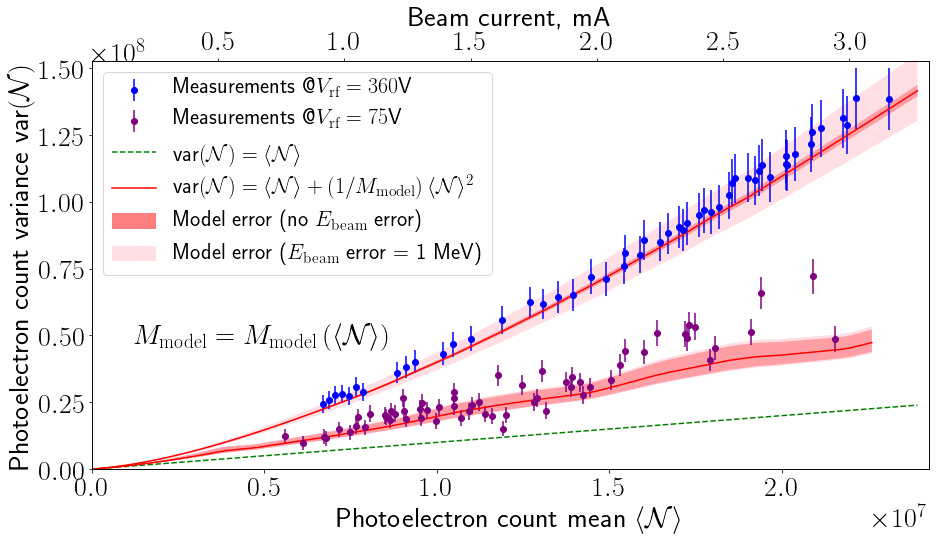

In [7]:
from matplotlib import rc
rc("text", usetex=True)
plt.rcParams.update({'font.size': 28,'legend.fontsize':22})
colors = {"ROUND": 'blue', "ROUNDLONG": 'purple'}

fig, ax = plt.subplots(figsize=(15, 7.5))
ax.errorbar(meas_ROUND['N'],meas_ROUND['varN'],marker='o',linestyle='None',yerr=meas_ROUND['errorbar'],color='b', label = r'Measurements @$V_{\mathrm{rf}}=360$V')
ax.errorbar(meas_ROUND_LONG['N'],meas_ROUND_LONG['varN'],marker='o',linestyle='None',yerr=meas_ROUND_LONG['errorbar'],color='purple', label = r'Measurements @$V_{\mathrm{rf}}=75$V')
ax.plot(theor_ROUND['N'], theor_ROUND['N'],color='green',linestyle='--',label = r"var$\left(\mathcal{N}\right)=\langle\mathcal{N}\rangle$")


ax.plot(theor_ROUND['N'], theor_ROUND['varN'], color='red', label = r"var$\left(\mathcal{N}\right)=\langle\mathcal{N}\rangle+\left(1/M_{\mathrm{model}}\right)\langle\mathcal{N}\rangle^2$")
ax.fill_between(
    theor_ROUND['N'],
    theor_ROUND['varN_bottom_no_Ebeam'],
    theor_ROUND['varN_top_no_Ebeam'],
    facecolor='red', alpha=0.5, label='Model error (no $E_{\mathrm{beam}}$ error)')
ax.fill_between(
    theor_ROUND['N'],
    theor_ROUND['varN_bottom_with_Ebeam'],
    theor_ROUND['varN_top_with_Ebeam'],
    facecolor='pink', alpha=0.5, label='Model error ($E_{\mathrm{beam}}$ error = 1 MeV)')

ax.plot(theor_ROUND_LONG['N'], theor_ROUND_LONG['varN'], color='red')
ax.fill_between(
    theor_ROUND_LONG['N'],
    theor_ROUND_LONG['varN_bottom_no_Ebeam'],
    theor_ROUND_LONG['varN_top_no_Ebeam'],
    facecolor='red', alpha=0.5)
ax.fill_between(
    theor_ROUND_LONG['N'],
    theor_ROUND_LONG['varN_bottom_with_Ebeam'],
    theor_ROUND_LONG['varN_top_with_Ebeam'],
    facecolor='pink', alpha=0.5)

ax.set_ylabel(r"Photoelectron count variance var$\left(\mathcal{N}\right)$")
ax.set_xlabel(r"Photoelectron count mean $\langle\mathcal{N}\rangle$")
#ax.set_title(r"Round beam, no ND filters, variable beam current")
handles, labels = plt.gca().get_legend_handles_labels()
order = [4,5,0,1,2,3]
ax.legend([handles[idx] for idx in order],[labels[idx] for idx in order])
ax.text(0.05,0.55-0.25,r'$M_{\mathrm{model}}=M_{\mathrm{model}}\left(\langle\mathcal{N}\rangle\right)$',transform=ax.transAxes)
ax.set_xlim(0, 1.05*meas_ROUND['N'].max())
ax.set_ylim(0, 1.1*meas_ROUND['varN'].max())
ax1 = ax.twiny()
ax1.set_xlabel('Beam current, mA')
ax1.set_xlim(N_to_I*np.asarray(ax.get_xlim()))
ax1.set_xticks(ticks=ax1.get_xticks()[1:-1])
plt.savefig('/home/ilobach/FUR_Run2_experiment_paper/images/round_round_long.png',bbox_inches='tight',dpi=300)
plt.show()

# for IPAC20

In [4]:
from config import get_from_config
cur_to_sum_channel = get_from_config("Beam_current_to_Sum_channel_ampl_V/mA")
sum_channel_to_photoelectrons = get_from_config('sum_channel_to_photoelectrons')
N_to_I = 1/sum_channel_to_photoelectrons/cur_to_sum_channel

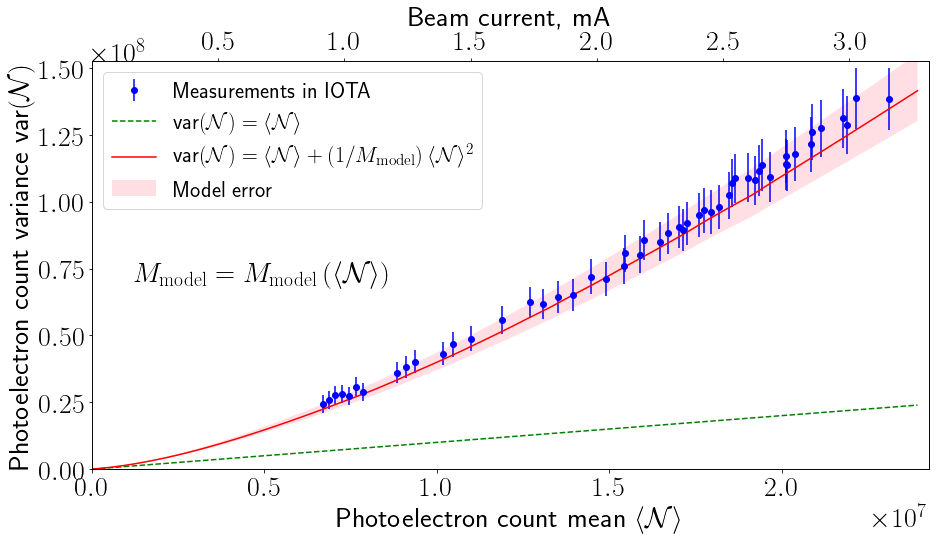

In [5]:
from matplotlib import rc
rc("text", usetex=True)
plt.rcParams.update({'font.size': 28,'legend.fontsize':22})
colors = {"ROUND": 'blue', "ROUNDLONG": 'purple'}

fig, ax = plt.subplots(figsize=(15, 7.5))
ax.errorbar(meas_ROUND['N'],meas_ROUND['varN'],marker='o',linestyle='None',yerr=meas_ROUND['errorbar'],color='b',
            label = r'Measurements in IOTA')
ax.plot(theor_ROUND['N'], theor_ROUND['N'],color='green',linestyle='--',label = r"var$\left(\mathcal{N}\right)=\langle\mathcal{N}\rangle$")


ax.plot(theor_ROUND['N'], theor_ROUND['varN'], color='red', label = r"var$\left(\mathcal{N}\right)=\langle\mathcal{N}\rangle+\left(1/M_{\mathrm{model}}\right)\langle\mathcal{N}\rangle^2$")
# ax.fill_between(
#     theor_ROUND['N'],
#     theor_ROUND['varN_bottom_no_Ebeam'],
#     theor_ROUND['varN_top_no_Ebeam'],
#     facecolor='red', alpha=0.5, label='Model error (no $E_{\mathrm{beam}}$ error)')
ax.fill_between(
    theor_ROUND['N'],
    theor_ROUND['varN_bottom_with_Ebeam'],
    theor_ROUND['varN_top_with_Ebeam'],
    facecolor='pink', alpha=0.5, label='Model error')


ax.set_ylabel(r"Photoelectron count variance var$\left(\mathcal{N}\right)$")
ax.set_xlabel(r"Photoelectron count mean $\langle\mathcal{N}\rangle$")
#ax.set_title(r"Round beam, no ND filters, variable beam current")
handles, labels = ax.get_legend_handles_labels()
order = [3,0,1,2]
ax.legend([handles[idx] for idx in order],[labels[idx] for idx in order])
ax.text(0.05,0.55-0.1,r'$M_{\mathrm{model}}=M_{\mathrm{model}}\left(\langle\mathcal{N}\rangle\right)$',transform=ax.transAxes)
ax.set_xlim(0, 1.05*meas_ROUND['N'].max())
ax.set_ylim(0, 1.1*meas_ROUND['varN'].max())
ax1 = ax.twiny()
ax1.set_xlabel('Beam current, mA')
ax1.set_xlim(N_to_I*np.asarray(ax.get_xlim()))
ax1.set_xticks(ticks=ax1.get_xticks()[1:-1])
plt.show()